In [93]:
import sys
sys.path.append('../')

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace import sarimax

from load_dataset import Dataset
import plotting

In [95]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
dataset = Dataset('../data/Dataset')

In [97]:
ts = dataset['international-airline-passengers.csv']
ts.index = ts.index.map(pd.to_datetime)

In [98]:
ts, ts_test = ts[:100], ts[100:]

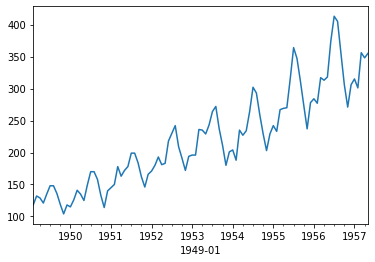

In [99]:
ts.plot()

#### Задание 1. Box-Jenkins approach
1. Убрать гетероскедастичность при помощи логарифмирования.
2. Продифференцировать разными способами и узнать нужный порядок дифференцирования d, D, анализируя
   получившийся ряд при помощи графика acf_plot.
3. Оценить параметры (q, Q), (p, P) по графикам acf, pacf продифференцированного ряда.
4. Обучить модель SARIMA и попробовать сделать предсказания исходного ряда.
5. Критерий хорошей модели (в идеале) - стационарные остатки.

In [91]:
# <ваш код здесь>

#### Задание 2. (используя критерий Акаике)
1. Выбрать сетку гиперпараметров.
2. Для кадого набора параметров:
    * обучить модель
    * сделать предсказание на тестовую выборку
    * получить остатки от предсказания
    * посчитать aic
    * запомнить aic для такого-то набора параметров
3. Выбрать модель с набором гиперпараметров, дающих минимальный aic. 

In [86]:
def calculate_akaike(y_true: np.array, y_pred: np.array, n_params: int):
    L = sum((y_true - y_pred)**2)
    n = len(y_true)
    return 2*n_params + n*np.log(L)

In [90]:
calculate_akaike(ts[-30:].values, ts[-30:].values+1, 100)

193.19760523667568

In [92]:
# ваш код здесь